In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv ('/content/movies_dataset.csv')


In [2]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,20543,NaN,NaN,NaN,"1,998",28957,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 13 1959,NaN,NaN,Bhai-Bahen,"6,219",NaN
20544,20544,7.7,NaN,Bimal Roy,"6,080",28958,Bollywood / Indian,Hindi,"01 Jan, 1970",May 13 1955,159,Devdas and Parvati had been inseparable as chi...,Devdas,"16,376","Rajinder Singh Bedi, Saratchandra Chatterjee, ..."
20545,20545,8.0,NaN,NaN,"3,276",30459,Bollywood / Indian,Hindi,"01 Jan, 1970",Mar 28 1958,1h 50min,"While driving his car on a rainy night, Anand'...",Madhumati,"7,220",NaN
20546,20546,NaN,NaN,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,"1,419",NaN


In [ ]:
count_of_missing_values=data.isna().sum()  
pd.DataFrame(data.isna().sum())    

,0
Unnamed: 0,0
IMDb-rating,841
appropriate_for,9476
director,1938
downloads,1
id,0
industry,1
language,542
posted_date,1
release_date,1


In [4]:
total_values = np.product(data.shape)
numerator = count_of_missing_values.sum()
miss_p  = (numerator/ total_values)*100
print(" The percentage of missing values from the dataset is :", miss_p)

NameError: ignored

# Data Cleaning and Preperation



In [5]:

data['appropriate_for']=data['appropriate_for'].fillna('Unrated')

data['appropriate_for'] =data['appropriate_for'].replace('Not Rated', 'Unrated')

data['views']=data['views'].fillna('0')
data['views'].isnull().sum()
data['views'] = data['views'].apply(lambda x:(x.replace(',', ''))).astype(int)



In [6]:
data['title'].value_counts()


The Girl Who Escaped: The Kara Robinson Story    402
Vaathi                                           402
Who Invited Charlie?                             402
Little Dixie                                     202
The Inspection                                   202
                                                ... 
Kesari                                             1
Old Boys                                           1
American Exit                                      1
Adventures of Aladdin                              1
Madhumati                                          1
Name: title, Length: 16572, dtype: int64

In [7]:
counts = data['title'].value_counts()
counts = counts[counts>76]

duplicate_titles=counts.index.tolist()
duplicate_titles

['The Girl Who Escaped: The Kara Robinson Story',
 'Vaathi',
 'Who Invited Charlie?',
 'Little Dixie',
 'The Inspection',
 'WWE Smackdown 2023-02-10',
 'Consent',
 'Vacation Home Nightmare',
 'Your Place or Mine',
 'Baby Ruby',
 'Carnifex',
 'Marlowe',
 'Shehzada',
 'TNA.Impact 2023-02-09',
 'WWE Raw 2023-02-13']

In [8]:
import math
def fix_duplicates(df,x):
    y = 0
    temp= []

    y=math.ceil(np.mean(x[x['title']==df]['views']))
    temp=x[x['title']==df].iloc[0]
    print(temp)

    x= x.drop(x[x['title']==df].index)

    x = x.append(temp,ignore_index = True)
    x.loc[x['title'] == df, 'views'] = y
    return x


In [9]:
for i in duplicate_titles:
    data = fix_duplicates(i,data)

Unnamed: 0                                                        28
IMDb-rating                                                      6.6
appropriate_for                                                TV-14
director                                                Simone Stock
downloads                                                        760
id                                                            371877
industry                                         Hollywood / English
language                                                     English
posted_date                                             15 Feb, 2023
release_date                                             Feb 11 2023
run_time                                                          88
storyline          It follows Kara Robinson as she survives an ab...
title                  The Girl Who Escaped: The Kara Robinson Story
views                                                           7430
writer                            

<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)
<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

Unnamed: 0                            63
IMDb-rating                          NaN
appropriate_for                  Unrated
director                             NaN
downloads                            309
id                                371669
industry                       Wrestling
language                         English
posted_date                 10 Feb, 2023
release_date                 Feb 09 2023
run_time                             NaN
storyline                            NaN
title              TNA.Impact 2023-02-09
views                               1337
writer                               NaN
Name: 42, dtype: object
Unnamed: 0                         44
IMDb-rating                       NaN
appropriate_for               Unrated
director                          NaN
downloads                       2,609
id                             371816
industry                    Wrestling
language                      English
posted_date              14 Feb, 2023
release_date       

<ipython-input-8-0b5e73a0f98e>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x = x.append(temp,ignore_index = True)


In [10]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.6,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.4,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,NaN,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,Sean Lahiff,"1,453",371943,Hollywood / English,English,"16 Feb, 2023",Dec 01 2022,93,An\r\n aspiring documentarian and two conserva...,Carnifex,11756,Shanti Gudgeon
17182,29,6.1,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17183,11,9.0,Unrated,Rohit Dhawan,"12,954",372039,Bollywood / Indian,Hindi,"18 Feb, 2023",Feb 17 2023,142,Bantu\r\n is hated by his father Valmiki since...,Shehzada,36237,"Hussain Dalal, Rohit Dhawan, Trivikram Srinivas"
17184,63,NaN,Unrated,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,NaN,NaN,TNA.Impact 2023-02-09,1380,NaN


In [11]:
data.shape


(17186, 15)

In [12]:
import re
def runtime_conversion(runtime):
    if runtime.isdigit():
        return int(runtime)
    else:
        # Define regex to extract numerical values
        hr_pattern = re.compile(r'(\d+)\s*(h|hr|hour)s?')
        min_pattern = re.compile(r'(\d+)\s*(m|min)')

        # Extracting numerical values from the input string
        hrs = 0
        mins = 0
        match = hr_pattern.search(runtime)
        if match:
            hrs = int(match.group(1))
        match = min_pattern.search(runtime)
        if match:
            mins = int(match.group(1))

        # Convert hours to minutes and return the total runtime in minutes
        return hrs * 60 + mins

In [13]:
#Replaced the NaN values with the average run time of movies
data['run_time'] = data['run_time'].fillna('90')

In [14]:
#Convert all the values of run_time to a standard int format
data['run_time'] = data['run_time'].apply(runtime_conversion)


In [15]:
#dropped industry with null value 
data=data.drop(data[data['id']==371111].index, axis=0)


In [16]:
# Dropping the columns director, storyline, writer as we don't require them
data_cleaned = data.drop(['director', 'writer','storyline'], axis=1)


In [17]:
from datetime import datetime
def conv_posted_date(v):
    format_1 = '%d %b, %Y'
    date = datetime.strptime(v,format_1)
    return date
def conv_release_date(v):
    format_1 = '%b %d %Y'
    date = datetime.strptime(v,format_1)
    return date

In [18]:
data_cleaned['posted_date'] = data_cleaned['posted_date'].apply(conv_posted_date)
data_cleaned['release_date'] = data_cleaned['release_date'].apply(conv_release_date)
data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.4,TV-PG,73,372091,Hollywood / English,English,2023-02-20,2023-02-05,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.2,R,"1,427",343381,Hollywood / English,"English,Hindi",2021-04-20,2021-06-18,107,In the Earth,14419
2,4,4.6,Unrated,657,372089,Tollywood,Hindi,2023-02-20,2023-01-26,122,Alone,2438
3,5,5.4,Unrated,746,372088,Tollywood,Hindi,2023-02-20,2021-11-26,131,Anubhavinchu Raja,2940
4,6,NaN,TV-PG,"5,332",372059,Wrestling,English,2023-02-19,2023-02-18,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,"1,453",371943,Hollywood / English,English,2023-02-16,2022-12-01,93,Carnifex,11756
17182,29,6.1,R,283,371876,Hollywood / English,English,2023-02-15,2023-02-15,110,Marlowe,3149
17183,11,9.0,Unrated,"12,954",372039,Bollywood / Indian,Hindi,2023-02-18,2023-02-17,142,Shehzada,36237
17184,63,NaN,Unrated,309,371669,Wrestling,English,2023-02-10,2023-02-09,90,TNA.Impact 2023-02-09,1380


In [19]:
from scipy import stats
t=data_cleaned.mode()['language'][0]
print(t)



English


In [20]:
data_cleaned['language']=data_cleaned['language'].fillna('English')

In [21]:
data

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002,John Christian Plummer
1,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107,As the world searches for a cure to a disastro...,In the Earth,14419,Ben Wheatley
2,4,4.6,Unrated,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,2438,Rajesh Jayaraman
3,5,5.4,Unrated,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,2940,"Srinivas Gavireddy, Mayukh Adithya"
4,6,NaN,TV-PG,NaN,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,11978,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,Unrated,Sean Lahiff,"1,453",371943,Hollywood / English,English,"16 Feb, 2023",Dec 01 2022,93,An\r\n aspiring documentarian and two conserva...,Carnifex,11756,Shanti Gudgeon
17182,29,6.1,R,Neil Jordan,283,371876,Hollywood / English,English,"15 Feb, 2023",Feb 15 2023,110,"In late 1930's Bay City, a brooding, down on h...",Marlowe,3149,"William Monahan, John Banville, Raymond Chandler"
17183,11,9.0,Unrated,Rohit Dhawan,"12,954",372039,Bollywood / Indian,Hindi,"18 Feb, 2023",Feb 17 2023,142,Bantu\r\n is hated by his father Valmiki since...,Shehzada,36237,"Hussain Dalal, Rohit Dhawan, Trivikram Srinivas"
17184,63,NaN,Unrated,NaN,309,371669,Wrestling,English,"10 Feb, 2023",Feb 09 2023,90,NaN,TNA.Impact 2023-02-09,1380,NaN


In [22]:
count_of_missing_values=data_cleaned.isna().sum()  
pd.DataFrame(data_cleaned.isna().sum())  

,0
Unnamed: 0,0
IMDb-rating,486
appropriate_for,0
downloads,0
id,0
industry,0
language,0
posted_date,0
release_date,0
run_time,0


# Exploratory Data Analysis

## What factors influence the number of downloads a movie receives? How much of an impact does the industry, language, or release date have on the number of downloads?

In [23]:
data_cleaned.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                  object
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

In [24]:
data_status = data_cleaned.copy()
data_status['downloads'] = data_status['downloads'].str.replace(',','')

data_status["downloads"] = pd.to_numeric(data_status["downloads"])

data_status.dtypes

Unnamed: 0                  int64
IMDb-rating               float64
appropriate_for            object
downloads                   int64
id                          int64
industry                   object
language                   object
posted_date        datetime64[ns]
release_date       datetime64[ns]
run_time                    int64
title                      object
views                       int64
dtype: object

In [25]:
data_status['industry']=data_status['industry'].astype('category').cat.codes
data_status['language']=data_status['language'].astype('category').cat.codes
data_status['appropriate_for']=data_status['appropriate_for'].astype('category').cat.codes


In [26]:
data_status.release_date=pd.to_datetime(data_status.release_date)
data_status.release_date=pd.to_numeric(data_status.release_date)


In [27]:
lindata = data_status.copy()
corr_data = lindata.corr()['downloads'].sort_values()
corr_data


id                -0.191444
industry          -0.124834
appropriate_for   -0.042403
release_date      -0.000706
IMDb-rating        0.133105
Unnamed: 0         0.165327
language           0.304343
run_time           0.369027
views              0.946408
downloads          1.000000
Name: downloads, dtype: float64

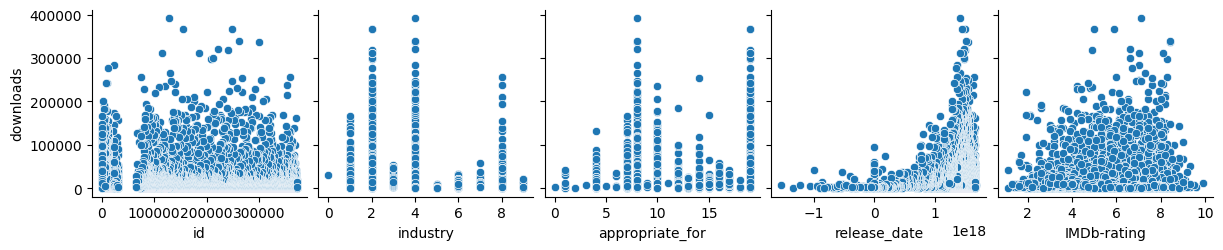

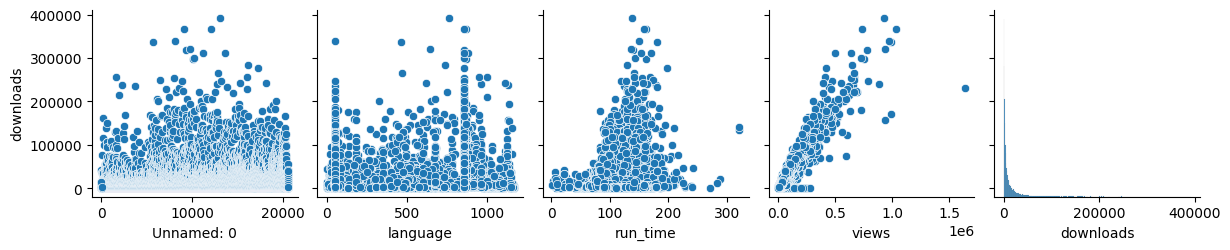

In [28]:
import seaborn as sns

for i in range(0, len(corr_data.index), 5):
    sns.pairplot(data=lindata,
                x_vars = corr_data.index[i : i + 5],
                y_vars = ['downloads'])

We observe that Rumtime, Views, Language and IMDb-rating have +ve correlation and industry, appropriate for, release-date variables have -ve correlation with Downloads.

Also, the variables views, runtime and language have the highest correlation values which implies that these variables highly affects the number of downloads, whereas variables like release_date and appropriate_for have lowest correlation values which implies they have very less impact on the number of downloads.  

## KNN Regression to find missing values of IMDB Ratings

In [29]:
# Diving Data according to wheather the IMDB ratings are known or not
X_predict=data_status[data_status['IMDb-rating'].isna()]
y_predict=X_predict['IMDb-rating']
X1=data_status[data_status[['IMDb-rating']].notnull().all(1)]
y=X1['IMDb-rating']


In [30]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


X=X1.loc[:,['downloads','run_time','language','views']]


from sklearn import preprocessing
from sklearn import utils





# Instance and fit
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=90).fit(X_train, y_train)

# Score
score_knn = knn_model.score(X_test, y_test)
print(score_knn)




0.05597537695695898


In [31]:

# Predictions
X_predict2=X_predict.loc[:,['downloads','run_time','language','views']]

y_predict = knn_model.predict(X_predict2)



In [32]:
X_predict.drop(['IMDb-rating'],axis=1,inplace=True)

<ipython-input-32-ac4e1068fc93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict.drop(['IMDb-rating'],axis=1,inplace=True)


In [33]:
X_predict

,Unnamed: 0,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
4,6,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978
9,12,19,2253,372038,9,54,2023-02-18,1676592000000000000,90,WWE Smackdown 2023-02-17,5468
12,16,19,2785,371990,6,1074,2023-02-17,1676505600000000000,90,Sab Fadey Jaange.2023,12968
14,18,19,171,371988,9,54,2023-02-17,1676505600000000000,90,TNA.Impact 2023-02-16,667
18,24,19,1299,371932,2,854,2023-02-16,1674259200000000000,142,Ho Ja Mukt,10891
...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218
17168,20543,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219
17176,55,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842
17184,63,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


In [34]:
X_predict['IMDb-rating']=y_predict

<ipython-input-34-48f3ff72ad7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_predict['IMDb-rating']=y_predict


In [35]:
X_predict

,Unnamed: 0,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views,IMDb-rating
4,6,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978,5.266667
9,12,19,2253,372038,9,54,2023-02-18,1676592000000000000,90,WWE Smackdown 2023-02-17,5468,6.017778
12,16,19,2785,371990,6,1074,2023-02-17,1676505600000000000,90,Sab Fadey Jaange.2023,12968,5.705556
14,18,19,171,371988,9,54,2023-02-17,1676505600000000000,90,TNA.Impact 2023-02-16,667,5.415556
18,24,19,1299,371932,2,854,2023-02-16,1674259200000000000,142,Ho Ja Mukt,10891,5.548889
...,...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218,6.292222
17168,20543,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219,6.292222
17176,55,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842,6.081111
17184,63,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380,5.410000


In [36]:
data_cleaned=pd.concat([X1,X_predict])

In [37]:
data_cleaned

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.400000,15,73,372091,4,54,2023-02-20,1675555200000000000,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.200000,10,1427,343381,4,351,2021-04-20,1623974400000000000,107,In the Earth,14419
2,4,4.600000,19,657,372089,8,854,2023-02-20,1674691200000000000,122,Alone,2438
3,5,5.400000,19,746,372088,8,854,2023-02-20,1637884800000000000,131,Anubhavinchu Raja,2940
5,7,6.500000,10,1781,371751,4,54,2023-02-13,1676592000000000000,116,Sharper,18225
...,...,...,...,...,...,...,...,...,...,...,...,...
17155,20528,6.292222,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6218
17168,20543,6.292222,19,1998,28957,2,854,1970-01-01,-341020800000000000,90,Bhai-Bahen,6219
17176,55,6.081111,19,1781,371740,9,54,2023-02-13,1675987200000000000,90,WWE Smackdown 2023-02-10,4842
17184,63,5.410000,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


##What is the highest pirated movie together and from each industry? 

In [38]:
vd =data_cleaned[['title','views', 'industry']].sort_values(by='views', ascending=False)
vd

,title,views,industry
6993,Baaghi 2,1638533,2
7400,Tiger Zinda Hai,1038317,2
6585,Raid,993825,2
4666,Avengers: Endgame,991133,4
6643,Avengers: Infinity War,969673,4
...,...,...,...
358,TNA.Impact 2022-12-08,888,9
548,TNA.Impact 2022-11-03,873,9
502,TNA.Impact 2022-11-10,852,9
2749,Free Byrd,698,4


Text(0.5, 1.0, 'Highest viewed pirated Movies by Industry')

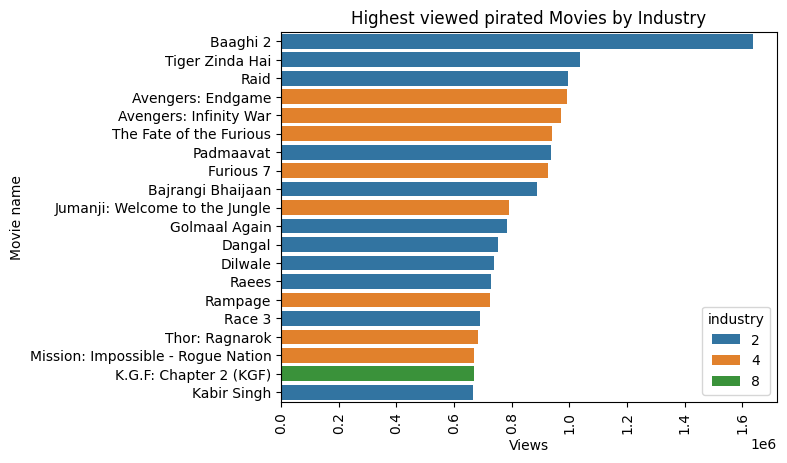

In [39]:
import seaborn as sns

sns.barplot(data=vd[0:20], y='title', x='views', hue = 'industry', orient='h', dodge=False)
plt.ylabel('Movie name')
plt.xlabel('Views')
plt.xticks(rotation=90)
plt.title('Highest viewed pirated Movies by Industry')

##Which industry is mostly affected by piracy?

In [40]:
import matplotlib.pyplot as plt
x=[]
industry_rate=data_cleaned['industry'].value_counts().values
industry_name = data_cleaned['industry'].value_counts().index
for i in industry_rate:
    x.append((0.5)*i + 0.5*1700)

Text(0.5, 1.0, 'Industry affected by Piracy ( Normalized Values)')

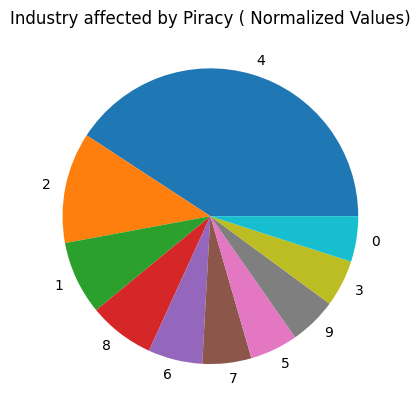

In [41]:
fig, ax = plt.subplots()

# ax.bar(industry_name, x)
plt.pie(x, labels = industry_name)

plt.xticks(rotation=80)

plt.title('Industry affected by Piracy ( Normalized Values)')


We can obsereve that Hollywood/English Industry is the most affected by Piracy followed by Bollywood/Indian Industry.

# Machine Learning Model

In [42]:

from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.linear_model import LinearRegression



In [43]:
data_status

,Unnamed: 0,IMDb-rating,appropriate_for,downloads,id,industry,language,posted_date,release_date,run_time,title,views
0,1,6.4,15,73,372091,4,54,2023-02-20,1675555200000000000,84,Grilling Season: A Curious Caterer Mystery,1002
1,2,5.2,10,1427,343381,4,351,2021-04-20,1623974400000000000,107,In the Earth,14419
2,4,4.6,19,657,372089,8,854,2023-02-20,1674691200000000000,122,Alone,2438
3,5,5.4,19,746,372088,8,854,2023-02-20,1637884800000000000,131,Anubhavinchu Raja,2940
4,6,NaN,15,5332,372059,9,54,2023-02-19,1676678400000000000,200,WWE Elimination Chamber,11978
...,...,...,...,...,...,...,...,...,...,...,...,...
17181,19,4.7,19,1453,371943,4,54,2023-02-16,1669852800000000000,93,Carnifex,11756
17182,29,6.1,10,283,371876,4,54,2023-02-15,1676419200000000000,110,Marlowe,3149
17183,11,9.0,19,12954,372039,2,854,2023-02-18,1676592000000000000,142,Shehzada,36237
17184,63,NaN,19,309,371669,9,54,2023-02-10,1675900800000000000,90,TNA.Impact 2023-02-09,1380


###Linear Regression
Predicting the number of views based on the number of downloads.





In [44]:
linear_reg = LinearRegression()
x =data_cleaned['downloads'].values.reshape(-1,1)
y = data_cleaned['views']        

linear_reg.fit(x,y)

LinearRegression()

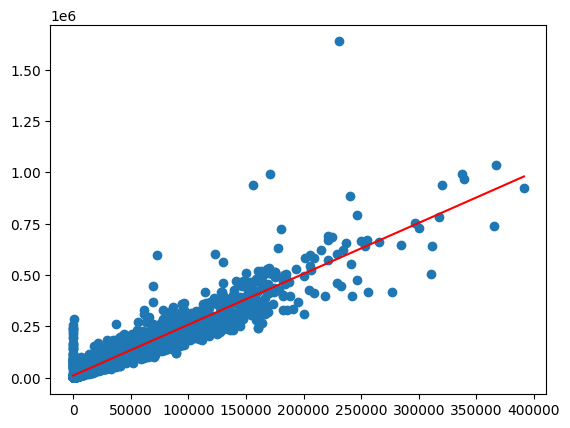

Mean Absolute Error:  299537.80400399084
Mean Squared Error:  117709157823.73244
Root Mean Squared Error:  343087.6824133044


In [45]:
x_array = np.arange(min(data_status['downloads']),max(data_status['downloads'])).reshape(-1,1)  # this for information about the line to be predicted

plt.scatter(x,y)
y_head = linear_reg.predict(x_array)                               
plt.plot(x_array,y_head,color="red")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [46]:
print(r2_score(y, linear_reg.predict(x)))


0.8956888826617468


###Multi Linear Regression
Predicting the number of views based on several variables like number of downloads, run_time, language and IMDb-rating of a movie.





In [47]:
multidata_x=data_cleaned.loc[:,['downloads','run_time','language','IMDb-rating']]
y=data_cleaned['views']
multidata_x.head()


,downloads,run_time,language,IMDb-rating
0,73,84,54,6.4
1,1427,107,351,5.2
2,657,122,854,4.6
3,746,131,854,5.4
5,1781,116,54,6.5


In [48]:
model=linear_reg.fit(multidata_x,y)

In [49]:
rmse=np.sqrt(mean_squared_error(y,model.predict(multidata_x)))
rmse

21533.476529727064

In [50]:
model.score(multidata_x,y)

0.8964162725828869

#Decision Tree Regression
Predicting the number of views based on the number of downloads of the movie.


In [51]:
from sklearn.tree import DecisionTreeRegressor               # our new prediction model
from sklearn.model_selection import train_test_split


x = data_status['downloads'].values.reshape(-1,1)
y = data_status['views'].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)


In [52]:
DT_reg = DecisionTreeRegressor()           # Decision Tree model
DT_reg.fit(x_train,y_train)                # fitting the final model according to train values



DecisionTreeRegressor()

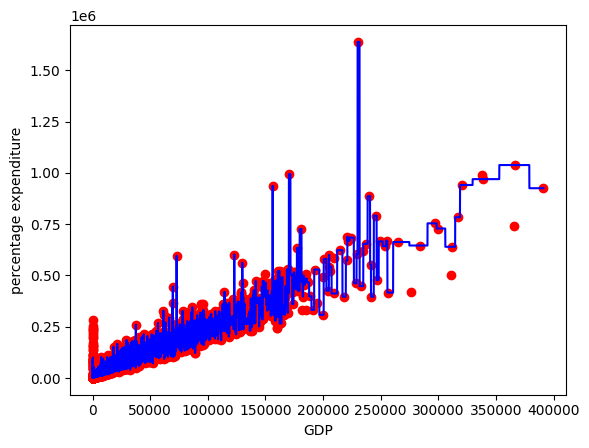

In [53]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   # line information to be drawn as a predict
y_head = DT_reg.predict(x_array)                        # percentage of spend estimate

plt.scatter(x,y, color="red")
plt.plot(x_array,y_head,color="blue")
plt.xlabel("GDP")
plt.ylabel("percentage expenditure")
plt.show()

We can see in the above plot Red points which were original points and blue lines are what our model predicts,our model is able to predict good results.